## (1) Install Python Packages (Run Once)

Run the section below to install needed Python packages

In [ ]:
import sys
!{sys.executable} -m pip install -r requirements.txt

## (2) Edit Tool Configuration and Execute
### (2.0) Available configurations

| Electrode model | Geometry |       | 20 µm | 30 µm | 40 µm | 40-lg µm | 75 µm | 100 µm | 100-lg µm |
|:---------------:|:--------:|:-----:|:-----:|:-----:|:-----:|:--------:|:-----:|:------:|:---------:|
|  **Monopolar**  |   Flat   | Human |   ✅   |   ⚠️   |   ✅   |     ✅    |   ⚠️   |   ⚠️    |     ⚠️     |
|  **Monopolar**  |   Flat   |  Rat  |   ❌   |   ⚠️   |   ⚠️   |     ⚠️    |   ⚠️   |    ⚠️   |     ⚠️     |
|   **Bipolar**   |   Flat   | Human |   ❌   |   ❌   |   ❌   |     ❌    |   ⚠️   |    ✅   |     ✅     |
|   **Bipolar**   |   Flat   |  Rat  |   ❌   |   ❌   |   ❌   |     ❌    |   ⚠️   |    ✅   |     ✅     |
|   **Bipolar**   |  Pillar  | Human |   ⚠️   |   ⚠️   |   ✅   |     ⚠️    |   ?    |     ?    |      ?     |
|   **Bipolar**   |  Pillar  |  Rat  |   ❌   |   ⚠️   |   ⚠️   |     ❌    |   ?   |     ?     |      ?     |

**Legend:**
- ✅ - The files exist
- ⚠️ - The files do not exist, but the configuration is possible
- ❌ - The files do not exist and the configuration does not make sense


### (2.1) Generating or loading a video sequence

You can choose to load pre-existing pattern by setting `generate_pattern = False` and providing the video sequence name.
Or you can generate a new video sequence by specifiying the patterns following the hierarchical structure:

- `ProjectionSequence()`
    - `Frames()`
        - `Subframes()`
            - `Patterns()`

Each level has its own parameters and contains a list of the lower-level strucutre. Please, do not forget to provide a video sequence name even if you generate a new one. 

<span style="color:red">Please only edit the cell between the lines `### DO NOT MOVE OR REMOVE THIS COMMENT x ###`</span>. These comments lines are essential for correctly storing the configuration. Please do not edit, move or remove them.

In [1]:
import os
import numpy as np
from utilities.common_utilities import save_cell

### PLASE EDIT BELOW - DO NOT MODIFY THIS COMMENT ###
from run_stages.pattern_generation_stage import Text, Grating, Rectangle, Circle, FullField, Subframe, Frame, ProjectionSequence

generate_pattern = True
video_sequence_name = ["book_text"]

""" 
Example of a more complex sequence combining text, shapes and gratings. 

text_shapes_subframes = [
    Subframe(duration_ms=15, patterns=[Text(user_position=(0, 0), rotation=0, unit="pixel", text="C", gap_size = 1.5)]),
    Subframe(duration_ms=15, patterns=[Rectangle(user_position=(2, 5), rotation=45, unit="um", width=75, height=75),
                                    Rectangle(user_position=(-2, 5), rotation=45, unit="pixel", width=0.75, height=0.75)]),
    Subframe(duration_ms=15, patterns=[Circle(user_position=(2, -5.5), unit="um", diameter=150),
                                    Circle(user_position=(-2, -5.5), unit="pixel", diameter=1.5)]),
    Subframe(duration_ms=30, patterns=[Text((-5, 0), 90, "THIS IS \n\nA SIMPLE TEST.", unit="um", letter_size=100),
                                    Text((5.5, 0), -90, "THIS IS \nA SIMPLE TEST.", unit="pixel", letter_size=1), 
                                    ]),
    Subframe(duration_ms=10, patterns=[FullField("white")]),
    Subframe(duration_ms=15, patterns=[FullField("black")])

]
grating_subframes = [
    Subframe(duration_ms=35, patterns=[Grating(user_position=(1.5, 0), rotation=45, unit="um", width_grating=75, pitch_grating=75)]),
    Subframe(duration_ms=40, patterns=[Grating(user_position=(0,0), rotation= -60, unit="pixel", width_grating=1, pitch_grating=1)]),
    Subframe(duration_ms=25, patterns=[FullField("black")])
]
list_of_frames = [
    Frame(name="00_Text_shapes", repetitions=1, subframes=text_shapes_subframes),
    Frame(name="01_Grating", repetitions=2, subframes=grating_subframes)
] """
durations = [10, 10, 10, 5, 5, 5, 3, 3, 3]
intensities = [0.06, 0.1, 0.12, 0.15, 0.2, 0.5, 0.7, 0.9, 1]

# list_projections = []
# video_sequence_name = []
#
# for duration, intensity in zip(durations, intensities):
#     subframes= [Subframe(duration_ms=duration, patterns=[FullField('white')]),
#                 Subframe(duration_ms=(500-duration), patterns=[FullField('black')])]
#
#     list_of_frames = [Frame(name="Full_Field_SD_{}ms_{}mW".format(duration, intensity), repetitions=1,
#                             subframes=subframes)]
#
#     list_projections.append(ProjectionSequence(intensity=intensity, frequency=2, frames=list_of_frames))
#     video_sequence_name.append("Full_Field_MP40_SD_{}ms_{}mW".format(duration, intensity))

### Simple full field for MP40 rat ###
# duration = 5
# intensity = 0.2
# frequency = 2
# subframes= [Subframe(duration_ms=duration, patterns=[FullField('white')]),
#                  Subframe(duration_ms=((1/frequency)*1E3-duration), patterns=[FullField('black')])]

# list_of_frames = [Frame(name="FF_SD_{}ms_{}mW".format(duration, intensity), repetitions=1, subframes=subframes)]

# list_projections = [ProjectionSequence(intensity=intensity, frequency=frequency, frames=list_of_frames)]
# video_sequence_name = ["MP40_rat_FF_SD_{}ms_{}mW".format(duration, intensity)]

### Simple Landolt C
duration = 9.8
intensity = 1
frequency = 30
subframes= [Subframe(duration_ms=duration, patterns=[Text(text='C')]),
                 Subframe(duration_ms=((1/frequency)*1E3-duration), patterns=[FullField('black')])]

list_of_frames = [Frame(name="Landolt_C_PS100", repetitions=1, subframes=subframes)]

list_projections = [ProjectionSequence(intensity=intensity, frequency=frequency, frames=list_of_frames)]
video_sequence_name = ["Landolt_C_PS100_30Hz"]


# TODO: make this part more robust
### PLEASE EDIT ABOVE - DO NOT MODIFY THIS COMMENT ###

# Related to saving this cell
path_projection_sequence_script = os.path.join(os.getcwd(), "proj_seq_script.py")
# If the file already exists, it is previous configuration which should have been deleted
os.remove(path_projection_sequence_script)  if os.path.exists(path_projection_sequence_script) else None
%history -n -f proj_seq_script.py
save_cell(path_projection_sequence_script, generate_pattern)

### (2.2) Other configuration settings
#### Flat human - Bipopolar - PS100

[2024-01-31 10:45:11] INFO       run_rpsim        Staring a new run
[2024-01-31 10:45:11] INFO       run_rpsim        Output directory: c:\Users\PalankerLab_Goose\Documents\Quentin\RPSim\user_files\user_output\10_45_11-2024_01_31
[2024-01-31 10:45:11] INFO       run_rpsim        Requested run stages: ['pattern_generation', 'resistive_mesh', 'current_sequence', 'circuit', 'simulation', 'post_process', 'plot_results']
[2024-01-31 10:45:11] INFO       run_rpsim        Running the following configuration
+--------------------------------+-------------------------------------------------------------------------------------------------------------------------------------+
| model                          | bipolar                                                                                                                             |
| pixel_size                     | 100                                                                                                                      

Processing z-slices of time-point: 2/2...: 100%|██████████| 2/2 [02:13<00:00, 66.53s/it]

[2024-01-31 10:48:02] INFO       run_rpsim        Running Plot_Results Stage


c:\Users\PalankerLab_Goose\Documents\Quentin\RPSim\run_stages\plot_results_stage.py:93: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig3.show()
[2024-01-31 10:48:03] INFO       run_rpsim        Finished running all provided configurations
[2024-01-31 10:48:03] INFO       run_rpsim        Execution time is 2.86 minutes


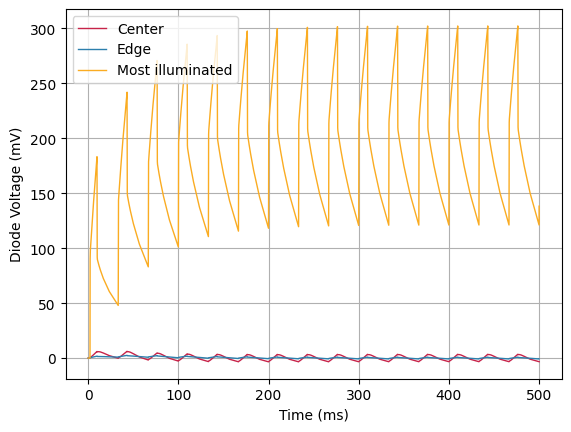

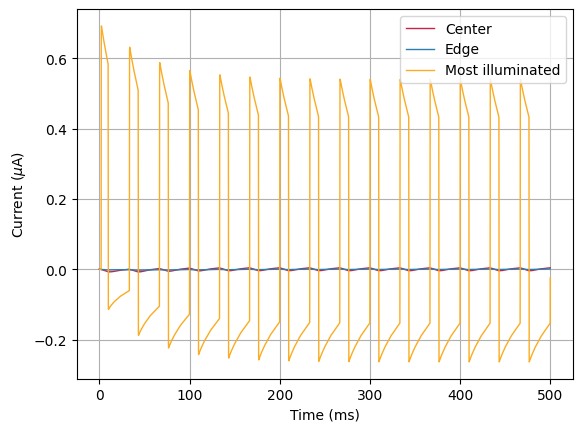

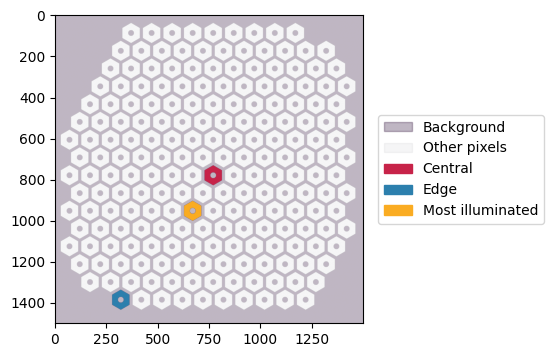

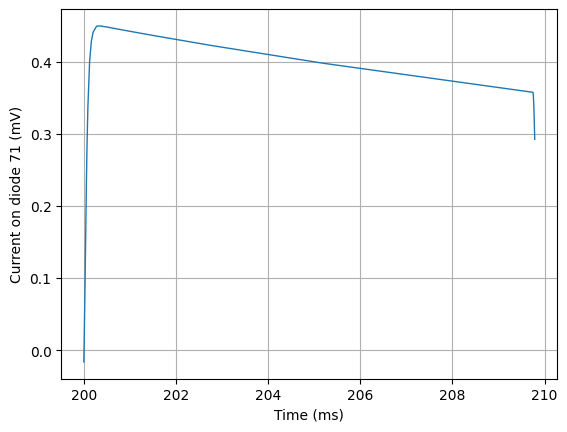

In [2]:
## PRIMA CONFIGURATION

%run proj_seq_script.py
os.remove(path_projection_sequence_script) if not generate_pattern else None

### CONFIGURATION
configuration = {}

# geometry-defined configuration
configuration["model"]                            = "bipolar"     # model geometry: monopolar or bipolar
configuration["pixel_size"]                       = 100           # pixel size
configuration["pixel_size_suffix"]                = ""         # If large format is required, use "-lg", else use ""
configuration["frame_width"]                      = 1000       # implant radius in mm
configuration["geometry"]                         = "Flat_human"  # geometry settings: HC/Pillar/Flat devices in
# pdish/rat/human
configuration["number_of_diodes"]                 = 2             # number of photo diodes per pixel
configuration["sirof_capacitance"]                = 6             # SIROF capacitance in mF/cm^2
configuration["photosensitive_area_edge_to_edge"] = 92           # edge-to-edge size of the photosensitive area
configuration["active_electrode_radius"]          = 17            # radius of the active electrode in um
configuration["light_to_current_conversion_rate"] = 0.4           # light to current conversion rate in A/W
configuration["photosensitive_area"]              = 4075.72       # total photosensitive area in um^2. Assign "None" for
# auto calculation (only works for monopolar)

# R matrix parameters
configuration["r_matrix_output_file"]             = f'R_{configuration["geometry"]}_PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}.pkl' 
configuration["r_matrix_conductivity"]            = 1             # conductivity scaling factor of the electrolyte

# dynamic simulation configuration
configuration["Ipho_scaling"]                     = 1  # artificial scaling of photo current, useful for
                                                     # parametric sweep (e.g. S-D curve)
configuration["Isat"]                             = 0.02          # diode saturation current in pA
configuration["ideality_factor"]                  = 1.14          # ideality factor n of the diode
configuration["shunt_resistance"]                 = 790150.0     # shunt resistance in Ohm. Assign "None" if no
# shunt
configuration["initial_Vactive"]                  = 0          # Initial bias of the active electrode in V
configuration["temperature"]                      = 37
configuration["nominal_temperature"]              = 25
# TODO make sure that the duration is sufficiently long compared to the frequencz, i.e. at least 6 times the period
configuration["simulation_duration_sec"]          = 0.5             # simulation duration in seconds
configuration["simulation_resolution_ms"]         = None          # None defaults to Xyce inner value

# input paths
configuration["user_files_path"]                  = None          # If set to None, defaults to inner user_files directory

#### Projection sequences related ####

configuration["video_sequence_name"]              = video_sequence_name
configuration["generate_pattern"]                 = generate_pattern
configuration["projection_sequences"]             = list_projections
configuration["path_projection_sequence_script"]  = path_projection_sequence_script
configuration["font_path"]                        = None # If set to None for, defaults to optometrist font Sloan.otf

configuration["pixel_label_input_file"]           = f'image_sequence/pixel_label_PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}.pkl'

# define input files for monopolar arrays
configuration["monopolar"] = \
    {
    "return_to_active_area_ratio": 5.7525,                      # ratio between return area and total active
        # area
    "r_matrix_input_file_diagonal": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_self.csv',
    "r_matrix_input_file_non_diagonal": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_Rmat.csv',
    "r_matrix_input_file_EP_return_2D": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_return_2D-whole.csv',
    "r_matrix_simp_ratio": 0.1,
    # TODO move the two files outside as they are common to mono- and bipolar
    "r_matrix_input_file_px_pos": f'r_matrix/COMSOL_results/PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}_pos.csv',
    "r_matrix_input_file_active": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_active.csv'
    }

# define input files for bipolar arrays
tmp = \
    {
    "additional_edges": 142,                                     # bipolar only: edge segments of the return
    "r_matrix_input_file_active": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_active.csv',
    "r_matrix_input_file_return": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return.csv', 
    "r_matrix_input_file_return_neighbor": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return_neighbor.csv',
    "r_matrix_input_file_px_pos": f'r_matrix/COMSOL_results/PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}_pos.csv',
    }
if configuration["model"] == 'bipolar': # Special file existing only for the PS100 and PS75 configurations 
        tmp["r_matrix_input_file_return_near"] = f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return_near.csv'

configuration["bipolar"] = tmp

# post-process parameters
configuration["post_process"] = \
    {
    "pulse_start_time_in_ms": (1/frequency)*1e3 * 6, # TODO this could be automated,
        # or made smaller
    "pulse_duration_in_ms": 9.8,
    "average_over_pulse_duration": False,
    # Related to the time dynamics analyzis
    "pulse_extra_ms": 0,
    "time_averaging_resolution_ms": 5,
    "interpolation_resolution_ms": 1e-3,
    "multiprocessing": False,
    "cpu_to_use": None, # If set to None, automatically uses 2/3 of the cpu available
    # Related to spatial analyzis 
    "depth_values_in_um": [np.arange(0,40,1).tolist()], #[[0, 22, 36, 45, 56, 66, 77, 79, 83, 86, 95, 102, 109, 120, 130, 142]], #[[0, 45, 77, 86, 109, 142]],                                     # if None, defaults
        # to all available in model
    "on_diode_threshold_mV": 50
    }


### EXECUTION
from RPSim import run_rpsim
# Stages name: "pattern_generation" - "resistive_mesh" - "current_sequence" - "circuit" - "simulation" - "post_process" - "plot_results"
run_stages = [ "pattern_generation", "resistive_mesh", "current_sequence", "circuit", "simulation", 'post_process', 'plot_results']
run_rpsim(configuration=configuration, run_stages=run_stages)#, skip_stages="post_process")

#### Flat rat - Monopolar - PS40

In [ ]:
## MP40 RAT CONFIGURATION

%run proj_seq_script.py
os.remove(path_projection_sequence_script) if not generate_pattern else None

### CONFIGURATION
configuration = {}

# geometry-defined configuration
configuration["model"]                            = "monopolar"     # model geometry: monopolar or bipolar
configuration["pixel_size"]                       = 40           # pixel size
configuration["pixel_size_suffix"]                = ""         # If large format is required, use "-lg", else use ""
configuration["frame_width"]                      = 750       # implant radius in mm
configuration["geometry"]                         = "Flat_rat"  # geometry settings: HC/Pillar/Flat devices in
# pdish/rat/human
configuration["number_of_diodes"]                 = 1             # number of photo diodes per pixel
configuration["sirof_capacitance"]                = 6             # SIROF capacitance in mF/cm^2
configuration["photosensitive_area_edge_to_edge"] = 36           # edge-to-edge size of the photosensitive area
configuration["active_electrode_radius"]          = 9            # radius of the active electrode in um
configuration["light_to_current_conversion_rate"] = 0.5           # light to current conversion rate in A/W
configuration["photosensitive_area"]              = 867.8999183638593   # total photosensitive area in um^2. Assign
# "None" for
# auto calculation

# R matrix parameters
configuration["r_matrix_output_file"]             = f'R_{configuration["geometry"]}_PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}.pkl'
configuration["r_matrix_conductivity"]            = 1             # conductivity scaling factor of the electrolyte

# dynamic simulation configuration
configuration["Ipho_scaling"]                     = 1  # artificial scaling of photo current, useful for
                                                     # parametric sweep (e.g. S-D curve)
configuration["Isat"]                             = 0.3          # diode saturation current in pA
configuration["ideality_factor"]                  = 1.5          # ideality factor n of the diode
configuration["shunt_resistance"]                 = None         # shunt resistance in Ohm. Assign "None" if no shunt
configuration["initial_Vactive"]                  = 0.4          # Initial bias of the active electrode in V
configuration["temperature"]                      = 37
configuration["nominal_temperature"]              = 25
configuration["simulation_duration_sec"]          = 2             # simulation duration in seconds
configuration["simulation_resolution_ms"]         = None          # None defaults to Xyce inner value

# input paths
configuration["user_files_path"]                  = None          # If set to None, defaults to inner user_files directory

#### Projection sequences related ####

configuration["video_sequence_name"]              = video_sequence_name
configuration["generate_pattern"]                 = generate_pattern
configuration["projection_sequences"]             = list_projections
configuration["path_projection_sequence_script"]  = path_projection_sequence_script
configuration["font_path"]                        = os.path.abspath("utilities/Sloan.otf")

configuration["pixel_label_input_file"]           = f'image_sequence/pixel_label_PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}.pkl'

# define input files for monopolar arrays
configuration["monopolar"] = \
    {
    "return_to_active_area_ratio": 5.7525,                      # ratio between return area and total active
        # area
    "r_matrix_input_file_diagonal": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_self.csv',
    "r_matrix_input_file_non_diagonal": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_Rmat.csv',
    "r_matrix_input_file_EP_return_2D": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_EP_return_2D-whole.csv',
    "r_matrix_simp_ratio": 0.1,
    # TODO: move the two files outside as they are common to mono- and bipolar
    "r_matrix_input_file_px_pos": f'r_matrix/COMSOL_results/PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}_pos.csv',
    "r_matrix_input_file_active": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_active.csv'
    }

# define input files for bipolar arrays
tmp = \
    {
    "additional_edges": 142,                                     # bipolar only: edge segments of the return
    "r_matrix_input_file_active": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_active.csv',
    "r_matrix_input_file_return": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return.csv',
    "r_matrix_input_file_return_neighbor": f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return_neighbor.csv',
    "r_matrix_input_file_px_pos": f'r_matrix/COMSOL_results/PS{configuration["pixel_size"]}{configuration["pixel_size_suffix"]}_pos.csv',
    }
if configuration["model"] == 'bipolar': # Special file existing only for the PS100 and PS75 configurations
        tmp["r_matrix_input_file_return_near"] = f'r_matrix/COMSOL_results/{configuration["geometry"]}/{configuration["geometry"]}_PS{configuration["pixel_size"]}_UCD_return_near.csv'

configuration["bipolar"] = tmp

# post-process parameters
configuration["post_process"] = \
    {
    "pulse_start_time_in_ms": (1/frequency)*1E3, # TODO: this could be automated,
        # or made smaller
    "pulse_duration_in_ms": duration,
    "average_over_pulse_duration": True,
    # Related to the time dynamics analyzis
    "pulse_extra_ms": 0,
    "time_averaging_resolution_ms": 5,
    "interpolation_resolution_ms": 1e-3,
    "multiprocessing": True,
    "cpu_to_use": None, # if sets to None, defaults to two thirds of the CPUs available
    # Related to spatial analyzis
    "depth_values_in_um": None, #[[0, 45, 77, 86, 109, 142]],                                     # if None, defaults
        # to all available in model
    "on_diode_threshold_mV": 50
    }


### EXECUTION
from RPSim import run_rpsim
# Stages name: "pattern_generation" - "resistive_mesh" - "current_sequence" - "circuit" - "simulation" - "post_process" - "plot_results"
run_stages = [ "pattern_generation", "resistive_mesh", "current_sequence", "circuit", "simulation", 'post_process', 'plot_results']
run_rpsim(configuration=configuration, run_stages=run_stages)#, skip_stages="post_process")